In [181]:
from tkinter import *
from PIL import ImageGrab, Image, ImageOps
import numpy as np
from scipy import signal, misc, ndimage
import matplotlib.pyplot as plt

In [111]:
Images = []

In [178]:
b1 = "up"
xold, yold = None, None
def main():
    root = Tk()
    root.title("Canvas Draw")
    drawing_area = Canvas(root,width=400,height=400,bg = "white",cursor="crosshair")
    drawing_area.pack(side="top", expand=True)
    drawing_area.bind("<Motion>", motion)
    drawing_area.bind("<ButtonPress-1>", b1down)
    drawing_area.bind("<ButtonRelease-1>", b1up)
    button4=Button(root,fg="green",text="Save",command=lambda:getter(drawing_area))
    button4.pack(side=RIGHT)
    button4=Button(root,fg="green",text="Clear",command=lambda:delete(drawing_area))
    button4.pack(side=LEFT)
    button4=Button(root,fg="green",text="Append",command=lambda:append(drawing_area))
    button4.pack(side=BOTTOM)
    def delete(widget):
        widget.delete("all")
    def getter(widget):
        x=root.winfo_rootx()+widget.winfo_x()
        y=root.winfo_rooty()+widget.winfo_y()
        x1=x+widget.winfo_width()
        y1=y+widget.winfo_height()
        ImageGrab.grab().crop((x,y,x1,y1)).save("Image.png")
    def append(widget):
        x=root.winfo_rootx()+widget.winfo_x()
        y=root.winfo_rooty()+widget.winfo_y()
        x1=x+widget.winfo_width()
        y1=y+widget.winfo_height()
        Images.append(ImageGrab.grab().crop((x,y,x1,y1)))
    root.mainloop()
def b1down(event):
    global b1
    b1 = "down"
def b1up(event):
    global b1, xold, yold
    b1 = "up"
    xold = None
    yold = None

def motion(event):
    if b1 == "down":
        global xold, yold
        if xold is not None and yold is not None:
            event.widget.create_line(xold,yold,event.x,event.y,smooth=True,width=6)
        xold = event.x
        yold = event.y
if __name__ == "__main__":
    main()

In [116]:
type(Images[0])

PIL.Image.Image

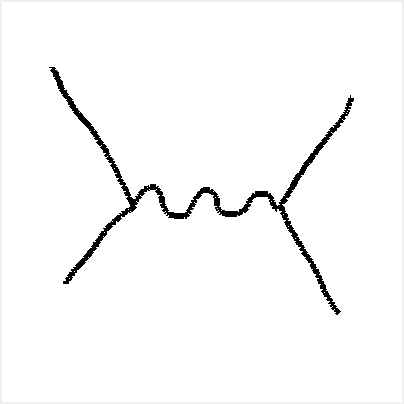

In [117]:
Images[0]

In [118]:
A = np.array(ImageOps.grayscale(Images[0]))

In [119]:
A.shape

(404, 404)

In [120]:
A = A[2:-2, 2:-2] #Ignoramos los bordes que dibuja en un tono de gris

In [121]:
A.shape

(400, 400)

In [122]:
A = A/255 #Normalizamos de 0 a 1

In [123]:
A = np.abs(1-A) #Invertimos la tonalidad

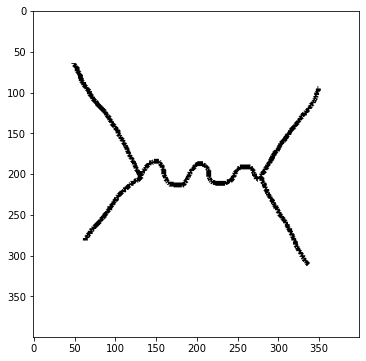

In [165]:
fig = plt.figure(figsize=(6,6))
plt.imshow(A,cmap="binary")
plt.show()

In [186]:
#Aplicamos dos filtros: Un max, y un average para suavisar las curvas (el programa las genera cortadas)

In [187]:
#Filtro de max (no cambia el tamaño)
B = ndimage.maximum_filter(A, size=2)

#Aplicamos un promedio de un filtro cuadrado de sxs, reduce el tamaño por 1/s
s = 2 #Stride y tamaño del filtro
Filter = np.array(np.ones((s,s)))/s**2 #Promedio
B = signal.convolve2d(B, Filter, boundary='fill', mode='same')[::s, ::s]

In [188]:
B.shape

(200, 200)

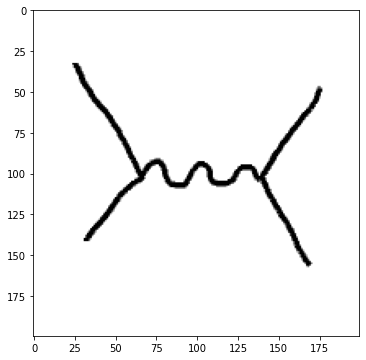

In [189]:
fig = plt.figure(figsize=(6,6))
plt.imshow(B,cmap="binary")
plt.show()